In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

Рассмотрим два простых двумерных датасета, сделанных с помощью `make_moons`, `make_circles`, и посмотрим, как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [50]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [51]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

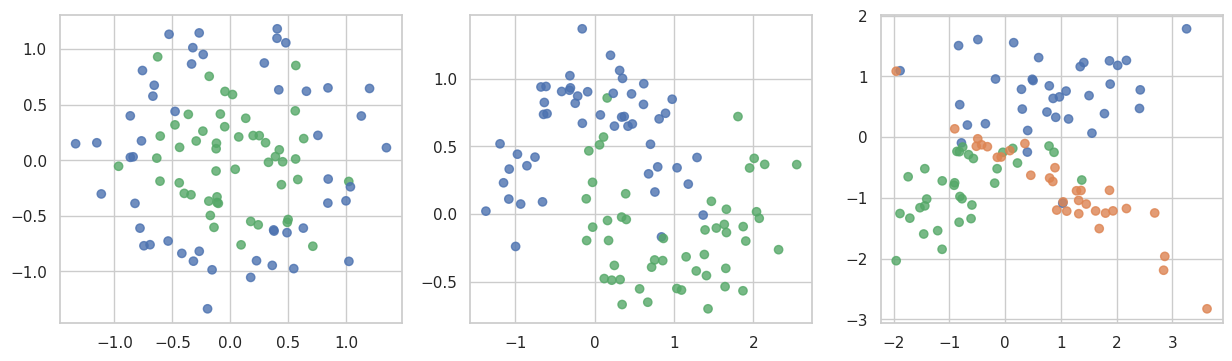

In [52]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Часть 1__

Для каждого датасета обучим решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Построим разделящие поверхности. Посчитаем accuracy на обучающей и тестовой выборках.

In [53]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

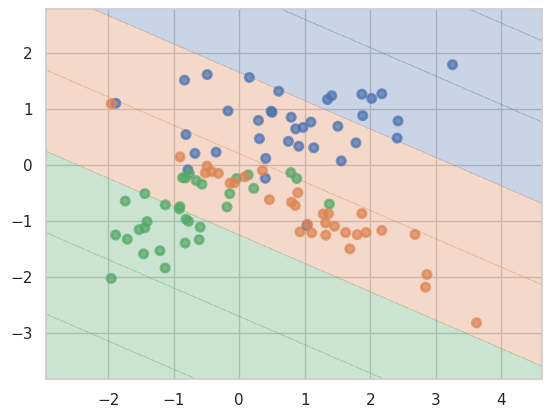

In [54]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

0.65


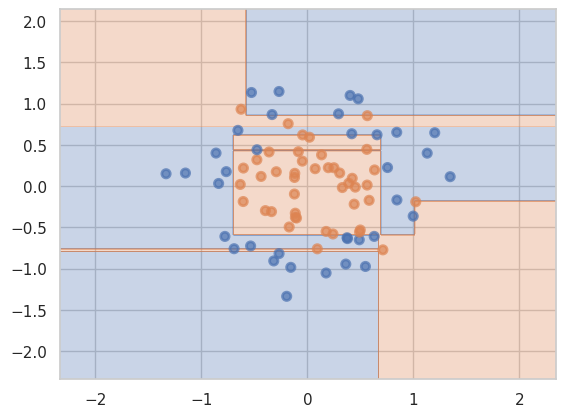

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_surface(model, X_train, y_train)

0.95


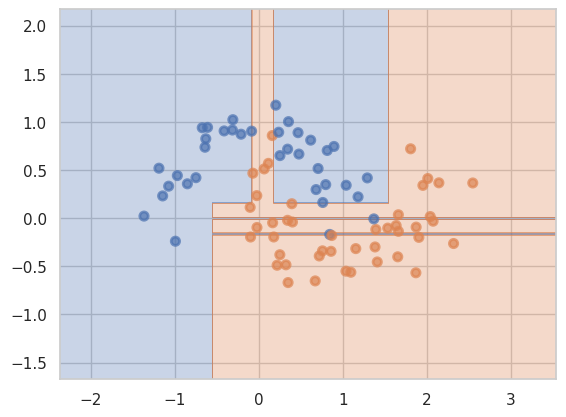

In [56]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_surface(model, X_train, y_train)

0.7


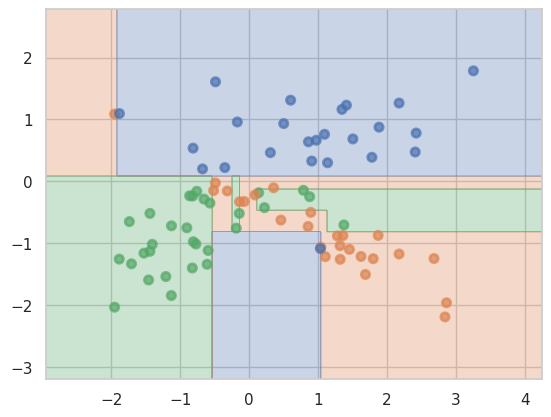

In [57]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
plot_surface(model, X_train, y_train)

Хотя видим, что значение accuracy довольно высокое (особенно на втором датасете), также можно заметить, что модель переобучается: это видно по графикам, поскольку существуют малые области, в которых модель явно подстраивается под данные.

__Часть 2__

Попробуем перебрать несколько параметров для регуляризации. Для каждого набора гиперпараметров построим разделяющую поверхность, выведем обучающую и тестовую ошибки. Проследим, как меняется разделяющая поверхность и обобщающая способность.

In [58]:
min_samples_value = np.arange(1, 9, 2)
max_depth = np.arange(3, 6)
params = {'min_samples_leaf': min_samples_value, 'max_depth': max_depth}

,min_samples_leaf,max_depth,train_score,test_score
0,1.0,3.0,0.8750,0.70
1,1.0,4.0,0.9625,0.70
2,1.0,5.0,0.9750,0.75
3,3.0,3.0,0.8625,0.75
4,3.0,4.0,0.9250,0.75
5,3.0,5.0,0.9375,0.70
6,5.0,3.0,0.8625,0.75
7,5.0,4.0,0.9125,0.85
8,5.0,5.0,0.9125,0.85
9,7.0,3.0,0.8375,0.80


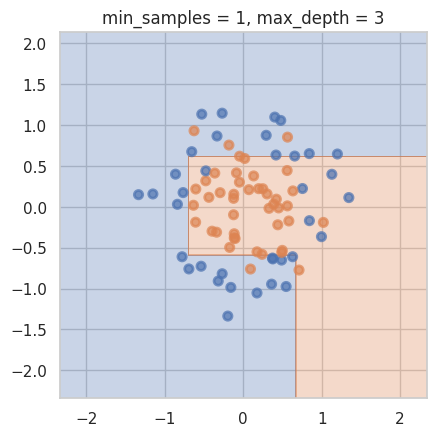

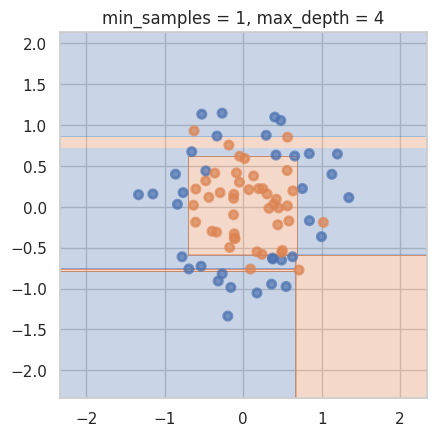

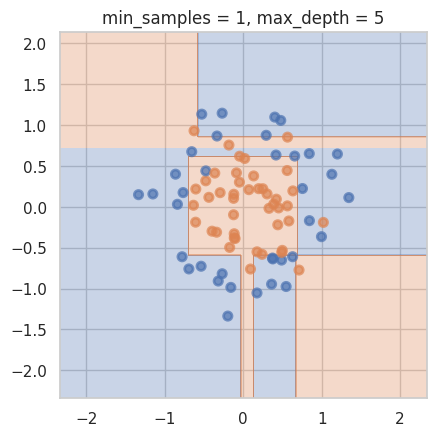

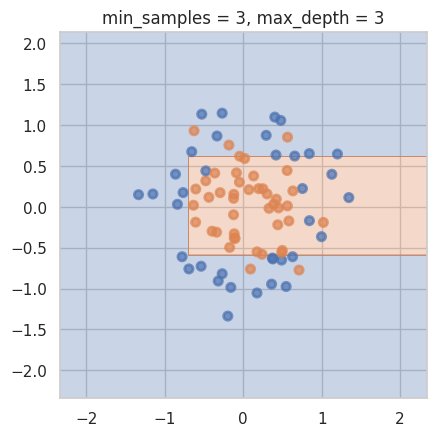

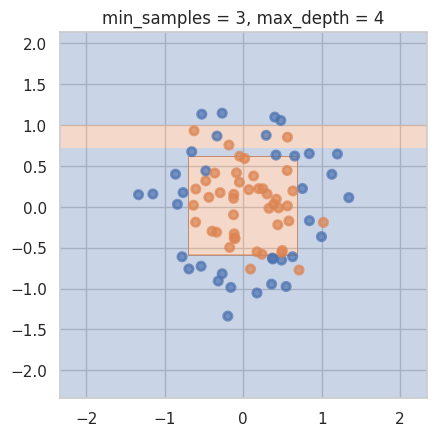

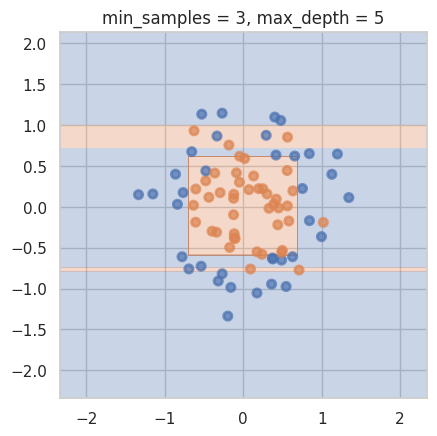

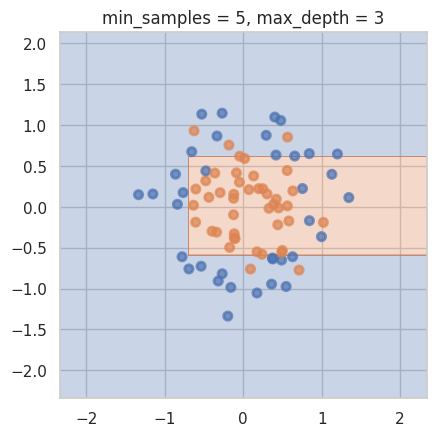

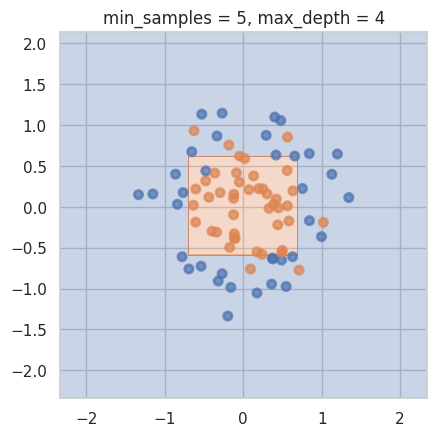

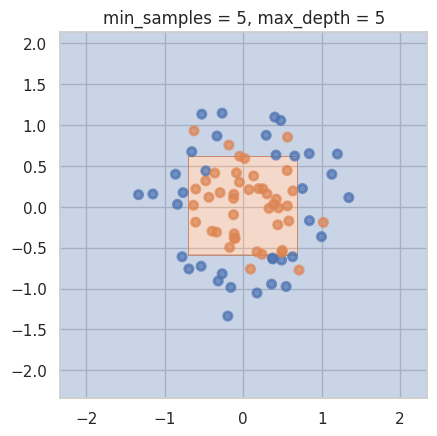

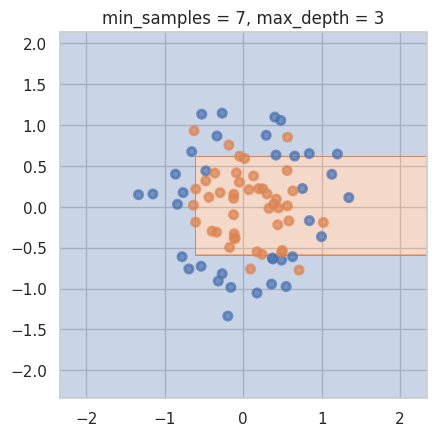

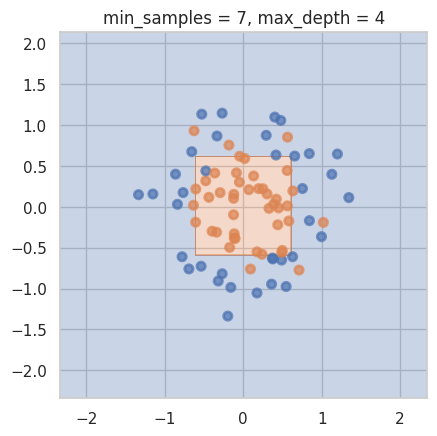

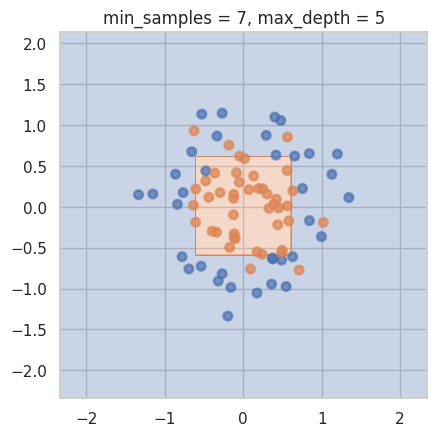

In [59]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
res = pd.DataFrame({'min_samples_leaf': [], 'max_depth': [], 'train_score': [], 'test_score': []})
count = 0
for i in min_samples_value:
  for j in max_depth:
    model = DecisionTreeClassifier(min_samples_leaf = i, max_depth = j)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    plt.figure(figsize=(5,5))
    title = 'min_samples = ' + str(i) + ', max_depth = ' + str(j)
    plt.title(title)
    plot_surface(model, X_train, y_train)
    res.loc[count] = [i, j, accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)]
    count += 1
res

,min_samples_leaf,max_depth,train_score,test_score
0,1.0,3.0,0.9125,1.00
1,1.0,4.0,0.9875,0.95
2,1.0,5.0,0.9875,0.95
3,3.0,3.0,0.9000,1.00
4,3.0,4.0,0.9625,0.95
5,3.0,5.0,0.9625,0.95
6,5.0,3.0,0.8875,0.85
7,5.0,4.0,0.9500,0.80
8,5.0,5.0,0.9500,0.80
9,7.0,3.0,0.8625,0.85


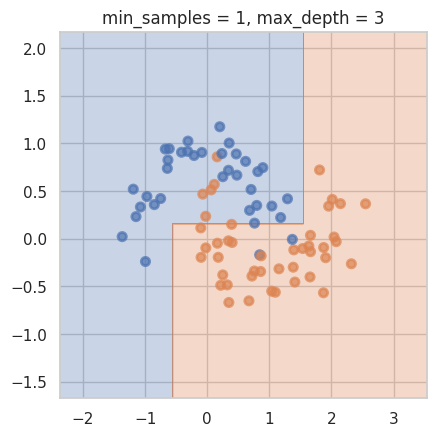

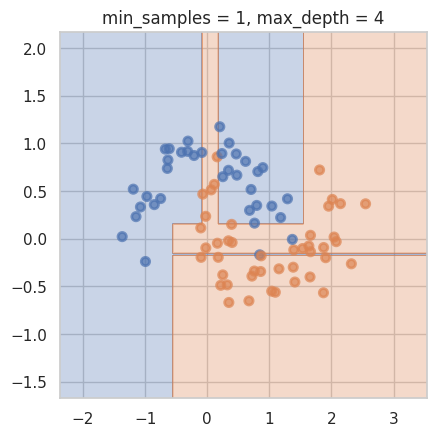

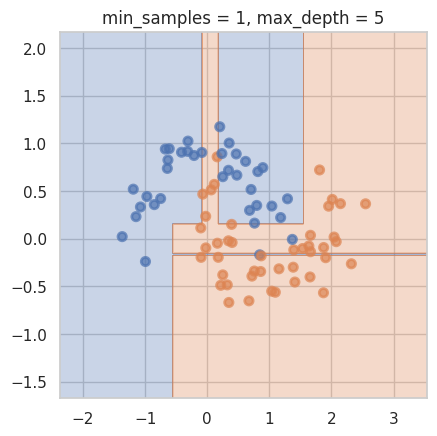

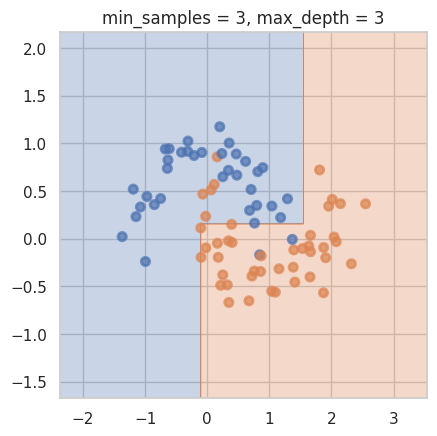

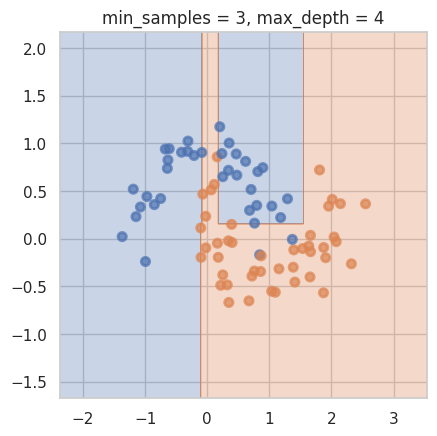

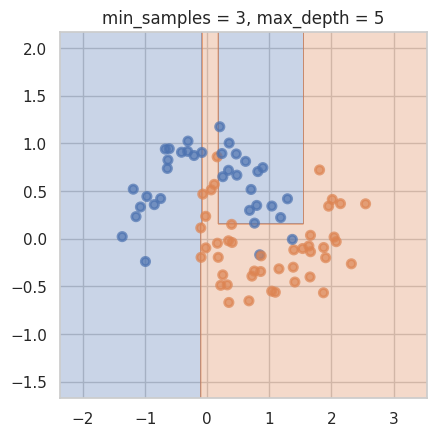

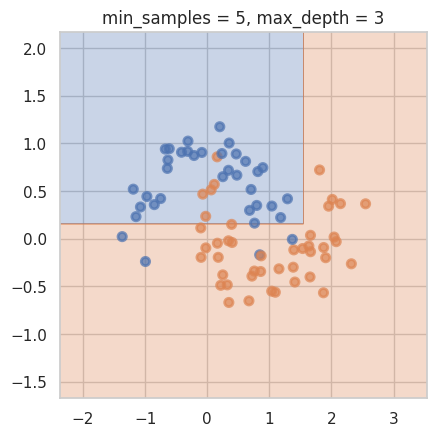

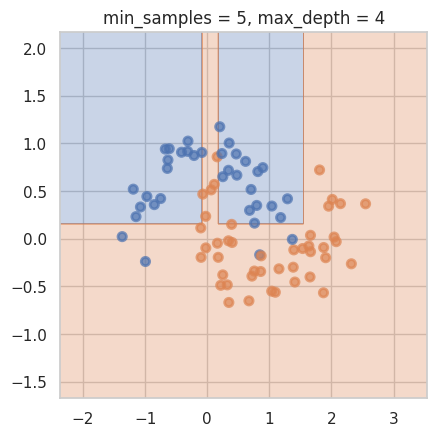

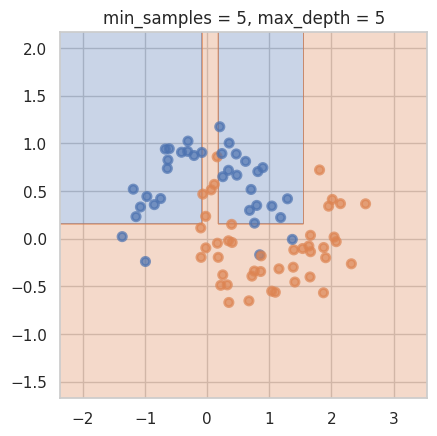

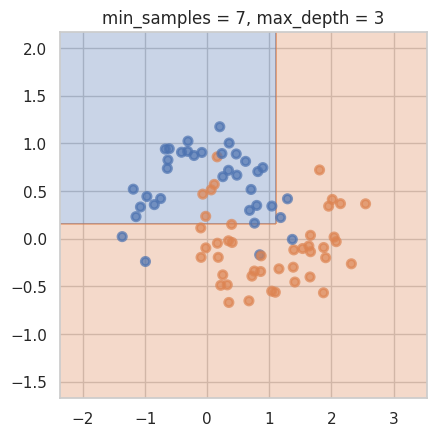

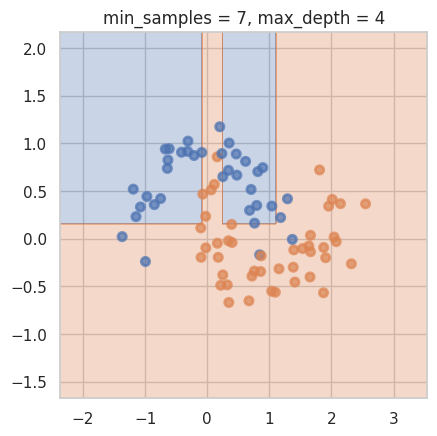

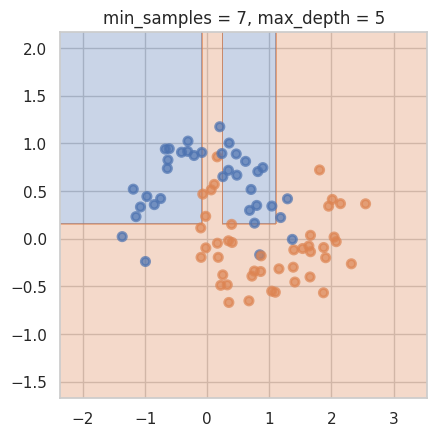

In [60]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
res = pd.DataFrame({'min_samples_leaf': [], 'max_depth': [], 'train_score': [], 'test_score': []})
count = 0
for i in min_samples_value:
  for j in max_depth:
    model = DecisionTreeClassifier(min_samples_leaf = i, max_depth = j)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    plt.figure(figsize=(5,5))
    title = 'min_samples = ' + str(i) + ', max_depth = ' + str(j)
    plt.title(title)
    plot_surface(model, X_train, y_train)
    res.loc[count] = [i, j, accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)]
    count += 1
res

,min_samples_leaf,max_depth,train_score,test_score
0,1.0,3.0,0.9000,0.75
1,1.0,4.0,0.9125,0.70
2,1.0,5.0,0.9375,0.70
3,3.0,3.0,0.8875,0.75
4,3.0,4.0,0.8875,0.75
5,3.0,5.0,0.9000,0.70
6,5.0,3.0,0.8875,0.75
7,5.0,4.0,0.9000,0.70
8,5.0,5.0,0.9000,0.70
9,7.0,3.0,0.8875,0.75


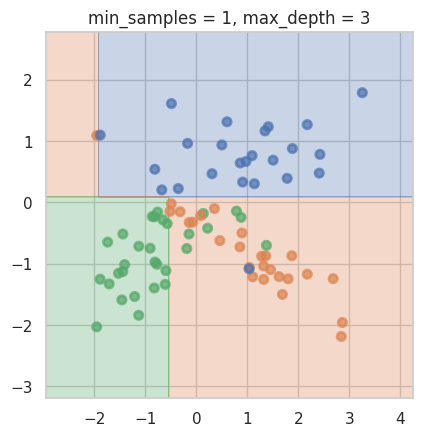

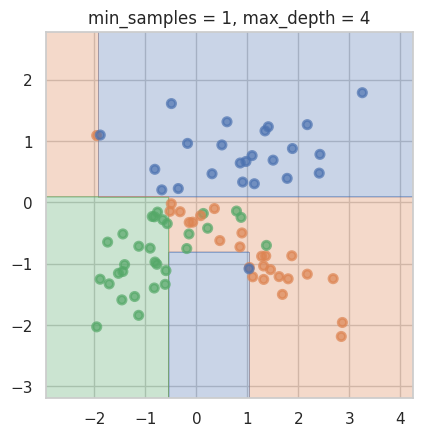

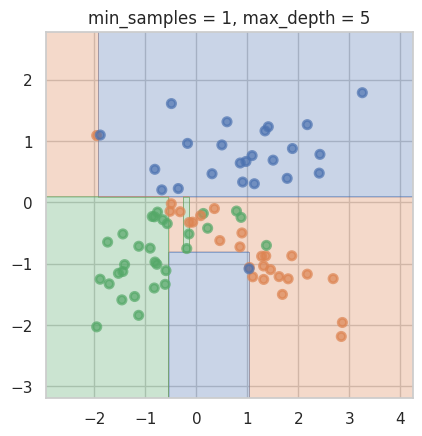

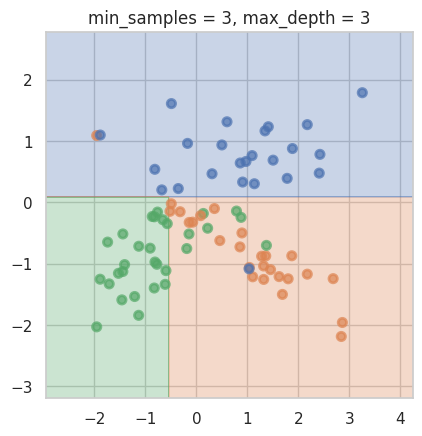

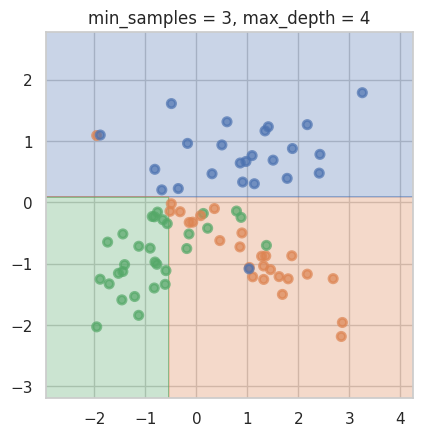

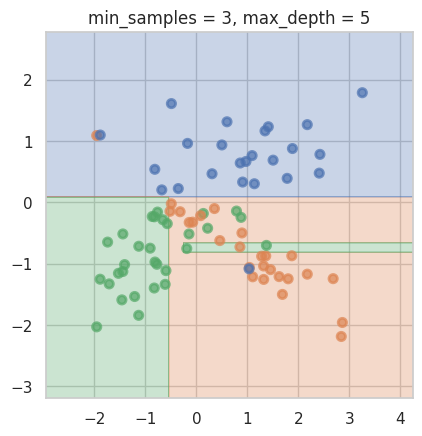

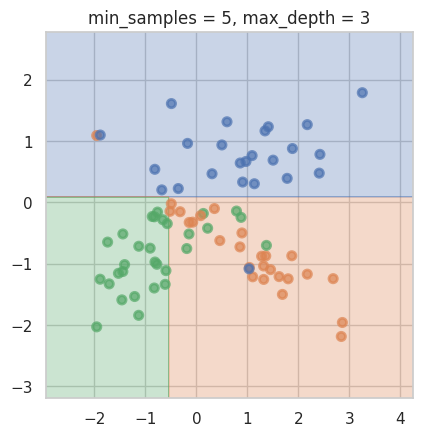

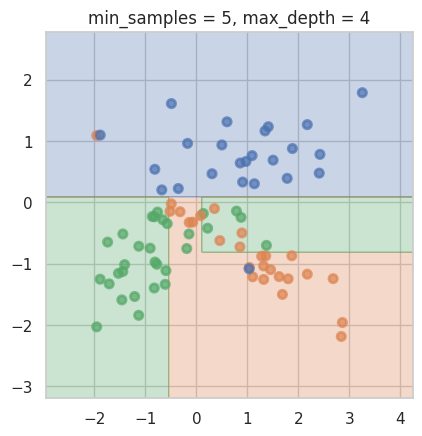

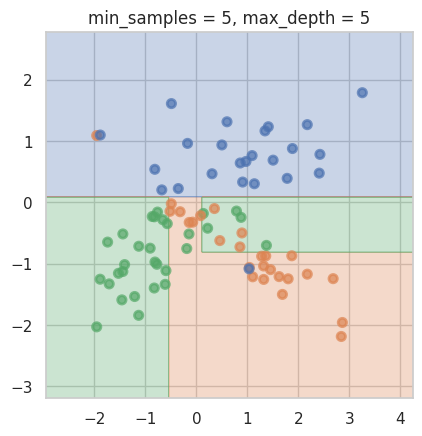

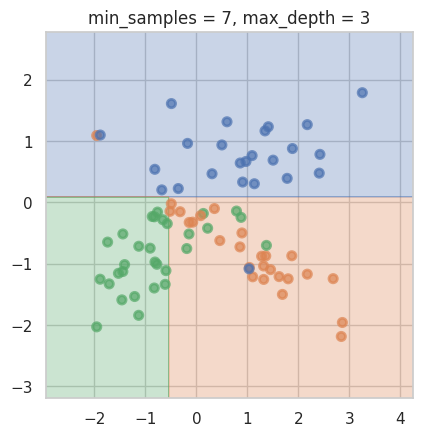

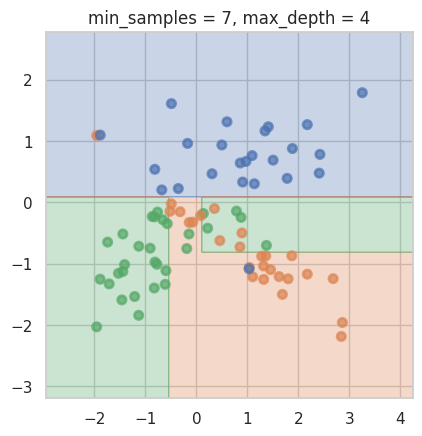

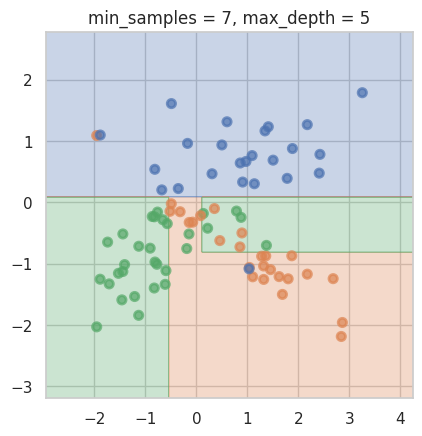

In [61]:
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
res = pd.DataFrame({'min_samples_leaf': [], 'max_depth': [], 'train_score': [], 'test_score': []})
count = 0
for i in min_samples_value:
  for j in max_depth:
    model = DecisionTreeClassifier(min_samples_leaf = i, max_depth = j)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    plt.figure(figsize=(5,5))
    title = 'min_samples = ' + str(i) + ', max_depth = ' + str(j)
    plt.title(title)
    plot_surface(model, X_train, y_train)
    res.loc[count] = [i, j, accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)]
    count += 1
res

Заметим, что для различных датасетов оптимальными оказываются различные способы регуляризации. Если для первого лучше подходило ограничение на минимум объектов в узле, то для второго столь однозначного вывода по сделанным тестам получить нельзя. Для третьего заметных улучшений при изменении параметров не наблюдалось.

# 2. Решающие деревья своими руками

__Часть 1__

Загрузим таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Построим на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируем scatter-графики "значение признака — класс" для всех пяти признаков.

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv('/content/drive/MyDrive/HSEHomework/5/students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [64]:
!cp /content/drive/MyDrive/HSEHomework/5/hw5code.py /content/

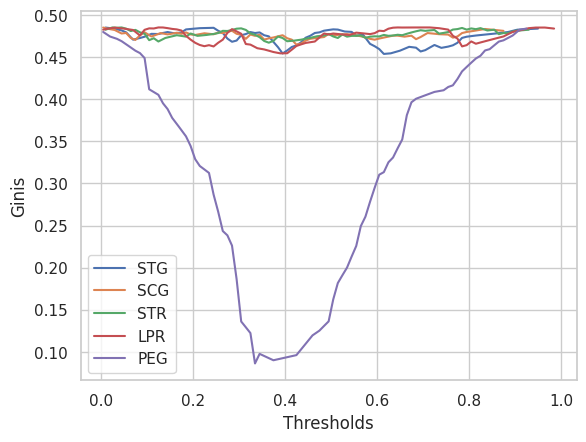

In [65]:
from hw5code import find_best_split, DecisionTree
target = df['UNS'].to_numpy()
for column in df.drop('UNS', axis = 1).columns:
  thresholds, ginis, _, _ = find_best_split(df[column].to_numpy(), target)
  plt.plot(thresholds, -ginis, label = column)
plt.legend()
plt.xlabel('Thresholds')
plt.ylabel('Ginis')
plt.show()

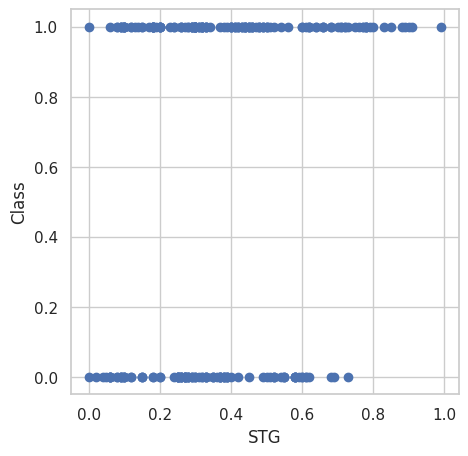

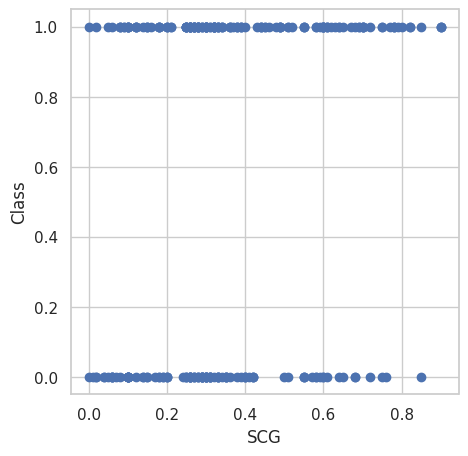

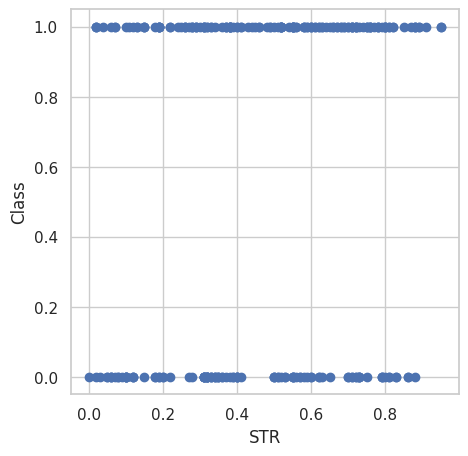

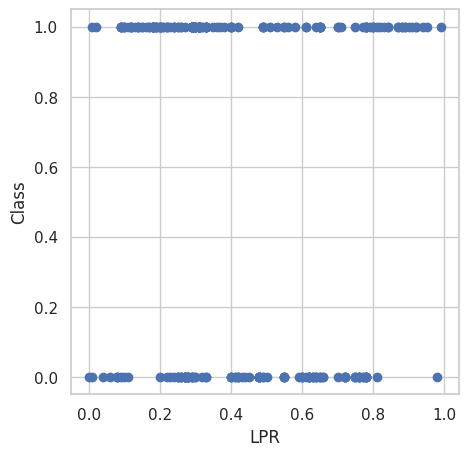

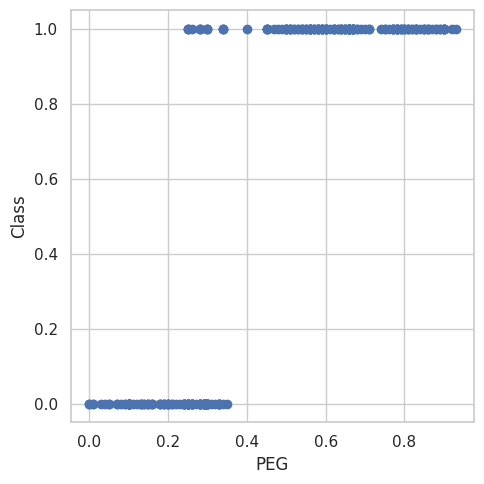

In [66]:
for column in df.drop('UNS', axis = 1).columns:
  plt.figure(figsize=(5,5))
  plt.scatter(df[column].to_numpy(), target)
  plt.xlabel(column)
  plt.ylabel('Class')
plt.tight_layout()

Исходя из кривых, производить деление следует по PEG, поскольку в остальных случаях кривые не претерпевают значительных изменений в зависимости от порога. Этот результат также согласуется с визуальной оценкой scatter-графиков, так как можно заметить, что прочие признаки не сильно влияют на принадлежность к тому или иному классу.
<br>

__Часть 2__

Протестируем свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom).

In [67]:
df = pd.read_table('/content/drive/MyDrive/HSEHomework/5/agaricus-lepiota.data', delimiter=',')

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
df_trans = df.apply(LabelEncoder().fit_transform)

In [69]:
X = df_trans.drop(df.columns[0], axis = 1)
y = df_trans[df_trans.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 14)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [70]:
tree = DecisionTree(['categorical'] * X_train.shape[1])

In [71]:
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

__Часть 3__

Построим графики зависимости качества предсказания в зависимости от параметров *max_depth*, *min_samples_leaf* и *min_samples_split* для датасета tic-tac-toe.

In [72]:
df = pd.read_table('/content/drive/MyDrive/HSEHomework/5/tic-tac-toe.data', delimiter=',')
df_trans = df.apply(LabelEncoder().fit_transform)
X = df_trans.drop(df.columns[-1], axis = 1)
y = df_trans[df_trans.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 14)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [73]:
max_depth = np.arange(1, 50, 1).astype(int)
min_samples_split = np.arange(1, 50, 1).astype(int)
min_samples_leaf = np.arange(1, 50, 1).astype(int)

In [74]:
a_md = []
a_mss = []
a_msl = []
for md, mss, msl in zip(max_depth, min_samples_leaf, min_samples_split):
  tree_md = DecisionTree(['categorical'] * X_train.shape[1], max_depth = md)
  tree_msl = DecisionTree(['categorical'] * X_train.shape[1], min_samples_leaf = msl)
  tree_mss = DecisionTree(['categorical'] * X_train.shape[1], min_samples_split = mss)
  tree_md.fit(X_train, y_train)
  tree_msl.fit(X_train, y_train)
  tree_mss.fit(X_train, y_train)
  a_md.append(accuracy_score(y_test, tree_md.predict(X_test)))
  a_mss.append(accuracy_score(y_test, tree_mss.predict(X_test)))
  a_msl.append(accuracy_score(y_test, tree_msl.predict(X_test)))

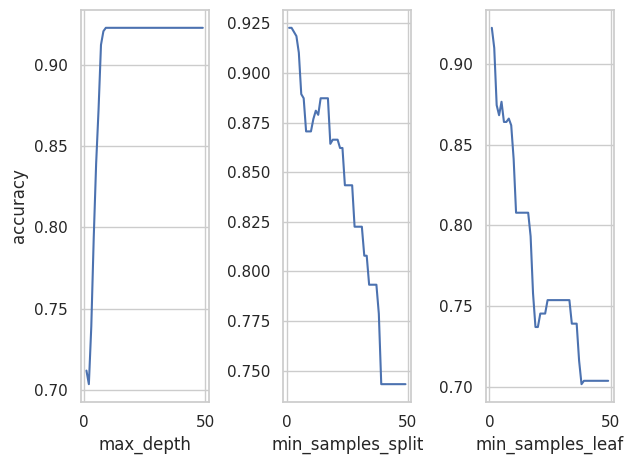

In [75]:
plt.subplot(1, 3, 1)
plt.plot(max_depth, a_md)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.subplot(1, 3, 2)
plt.plot(min_samples_split, a_mss)
plt.xlabel('min_samples_split')
plt.subplot(1, 3, 3)
plt.xlabel('min_samples_leaf')
plt.plot(min_samples_leaf, a_msl)
plt.tight_layout()
plt.show()

Можем заметить, что с введением ограничений на глубину и условий на разделение и количество элементов в листе постепенно уменьшается показатель accuracy. Это вполне естественно, так как дерево становится меньше и уже не способно охватить все закономерности в выборке (смещение возрастает). Необходимо в таком случае найти оптимальные параметры для сохранения деревом обобщающей способности при достаточно высоком accuracy.  